# Домашнее задание по теме «Работа с переменными»

## Задание
#### Цель: 
изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
#### Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. 

Прочитать информацию о признаках датасета можно, выполнив следующий ``код – print(fetch_california_housing().DESCR)``

## Этапы работы:

In [1118]:
import numpy as np
import pandas as pd

### 1. Получите данные и загрузите их в рабочую среду. 

In [1119]:
from sklearn import datasets

In [1120]:
print(fetch_california_housing().DESCR)
data = datasets.fetch_california_housing(as_frame=True).frame

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

##### Важные характерисики датасета:
:Количество экземпляров: 20640

:Количество атрибутов: 8 числовых, предиктивные атрибуты и цель (MedHouseVal)

:Информация об атрибутах:

- MedInc        средний доход в блок-группе
- HouseAge      cредний возраст дома в блочной группе
- AveRooms      среднее количество комнат на домохозяйство
- AveBedrms     cреднее количество спален на домохозяйство
- Population    население блок-группы
- AveOccup      среднее количество членов домохозяйства 
- Latitude      широта блок-группы
- Longitude     долгота блок-группы

: Отсутствующие значения атрибутов: нет


### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
(необязательный шаг)

In [1121]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [1122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [1123]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data[['MedHouseVal']]

In [1124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Постройте модель линейной регрессии. 

In [1125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1127]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [1128]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print(f'Для обучающей выборки: \nRMSE = {rmse_train} \nR2 = {r2_train}')

Для обучающей выборки: 
RMSE = 0.7234924745376032 
R2 = 0.6088968118672872


In [1129]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print(f'Для тестовой выборки: \nRMSE = {rmse_test} \nR2 = {r2_test}')

Для тестовой выборки: 
RMSE = 0.7273129773603112 
R2 = 0.5943232652466205


### 5.  Постройте график распределения целевой переменной.

In [1130]:
import matplotlib as plt

<AxesSubplot:ylabel='Frequency'>

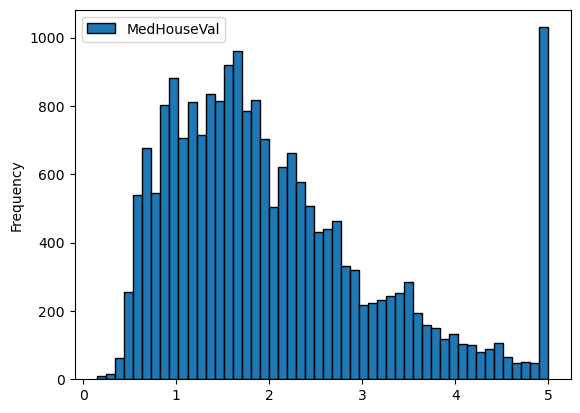

In [1131]:
y.plot(kind= 'hist', bins=50, edgecolor ='black')

<AxesSubplot:>

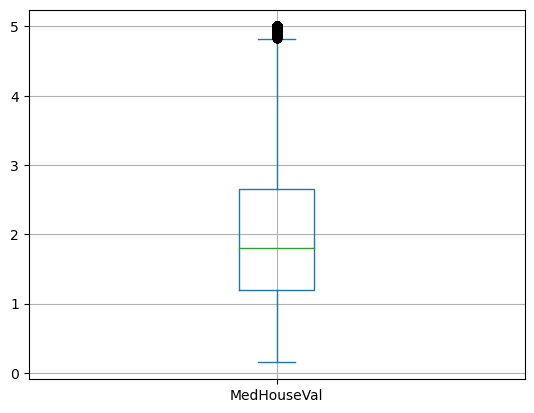

In [1132]:
y.plot(kind='box', grid=True)

In [1133]:
data[data['MedHouseVal'] > 4.9].shape

(1031, 9)

In [1134]:
data['MedHouseVal'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [1135]:
print(round(data[data['MedHouseVal'] > 4.9].shape[0] * 100 / data.shape[0], 2), '%')

5.0 %


#### Сделайте вывод. Присутствуют ли в этом признаке выбросы?

Признак "Средняя стоимость дома" колеблется от 0.15 до 5.0 (сотен тысяч долларов США). Средняя цена ~ 1.8 (00 000 $).
В целевой переменной явно присутствуют выбросы. Стоимость, с максимальным значением встречается в 5%,  это свидетельствует о том, что в выборку попали "особенные" дома. Они не подходят для средних оценок и снижают точность предсказаний

### 6. Посчитайте и выведите корреляционную матрицу. 
Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [1136]:
import seaborn as sns

In [1137]:
corr_matrix = data.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

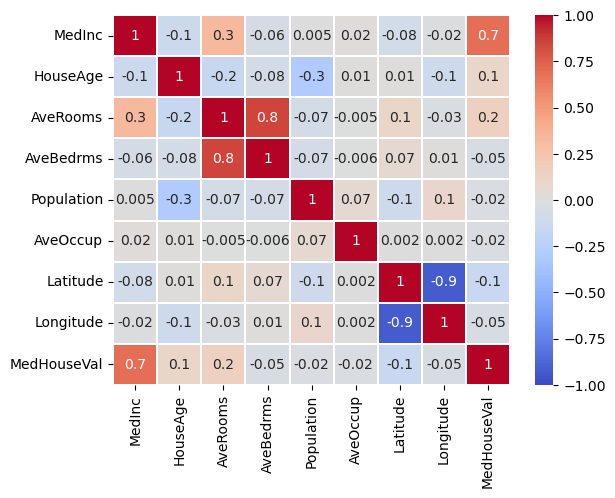

In [1138]:
sns.heatmap(corr_matrix, vmin = -1, vmax = +1, annot = True, fmt='.1g', cmap = 'coolwarm', linewidths=0.2, linecolor='white')

#### Сделайте выводы.

MedInc (средний доход в блок-группе) - сильно и положительно влияет на целевую характеристику

HouseAge (cредний возраст дома в блочной группе) - незначительно положительно влияет на целевую харктеристику

AveRooms (среднее количество комнат на домохозяйство) - значительно коррелирует с признаком "AveBedrms", положительно коррелирует с целевой характеристикой; положительно коррелирует с признаком "MedInc"

AveBedrms (cреднее количество спален на домохозяйство) - признак, который незначительно отрицательно коррелирует с целевой характеристикой; сильная коореляция только с признаком "AveRooms"


Population (население блок-группы) - незначительно отрицательно коррелирует с целевой характеристикой, отрицательная корреляция с признаком "HouseAge"

AveOccup (среднее количество членов домохозяйства) -  незначительно отрицательно коррелирует с целевой характеристикой; минимальное влияние на другие признаки 

Latitude (широта блок-группы) - незначительно отрицательно влияет на целевую харктеристику, сильна отрицательная корреляция с признаком "Longitude"; положительно коррелирует с признаком "AveRooms"; отрицательная корреляция с признаком "Population"

Longitude (долгота блок-группы) - признак, который незначительно отрицательно коррелирует с целевой характеристикой; сильна отрицательная корреляция с признаком "Latitude"; отрицательная корреляция с признаком "HouseAge"; положительно коррелирует с признаком "Population"

Выводы:

   + признаки "AveRooms" и "AveBedrms" сильно коррелируют, второй явно менее значим и может быть удален
   + в выборке присутствуют 2 признака ("Population" и "AveOccup") , которые очень слабо коррелируют с целевым признаком "MedHouseVal", их можно попробовать удалить
   
    
    

#### Проверим гипотезу, модель должна лучше работать, если удалить некоторые столбцы

In [1139]:
new_data = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'MedHouseVal']]
X = new_data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = new_data[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1140]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_1 = model.predict(X_train)
y_test_pred_1 = model.predict(X_test)

In [1141]:
rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
r2_train_1 = r2_score(y_train, y_train_pred_1)
print(f'Для обучающей выборки: \nRMSE = {rmse_train_1} \nR2 = {r2_train_1}')

rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
r2_test_1 = r2_score(y_test, y_test_pred_1)
print(f'\nДля тестовой выборки: \nRMSE = {rmse_test_1} \nR2 = {r2_test_1}')

Для обучающей выборки: 
RMSE = 0.7321811459843051 
R2 = 0.5994466182412557

Для тестовой выборки: 
RMSE = 0.7424116296739356 
R2 = 0.5773051453722329


$RMSE$ выросла ~ на 1 сотую, а $R^2$ понизилась. Гипотеза не подтвердилась. Стоит посмотреть на выбросы.

### 7. Исследуйте оставленные признаки на выбросы.
- Удалите выбросы в случае обнаружения.
- Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

###### Распределение признака "MedInc" (средний доход в блок-группе)

<AxesSubplot:ylabel='Frequency'>

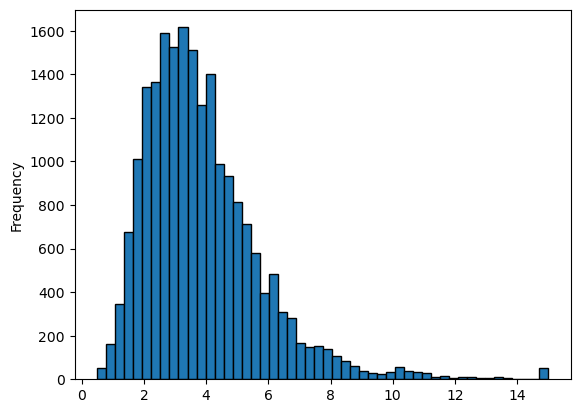

In [1142]:
new_data['MedInc'].plot(kind='hist', bins=50, edgecolor ='black')

Данные сильно скошены, попытаемся выровнять

In [1143]:
new_data['sqrt MedInc'] = np.sqrt(new_data['MedInc'])

C:\Users\sveta\AppData\Local\Temp\ipykernel_2260\4137528653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['sqrt MedInc'] = np.sqrt(new_data['MedInc'])


In [1144]:
new_data.reindex()
new_data.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal,sqrt MedInc
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,2.885342
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,2.881215
2,7.2574,52.0,8.288136,37.85,-122.24,3.521,2.693956
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,2.375521
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,1.961173


<AxesSubplot:ylabel='Frequency'>

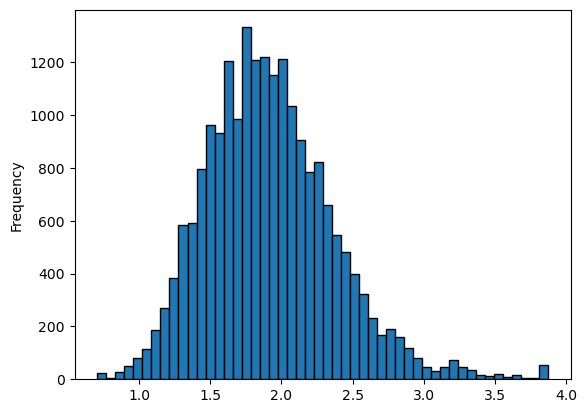

In [1145]:
new_data['sqrt MedInc'].plot(kind='hist', bins=50, edgecolor ='black')

In [1146]:
filter_X = new_data[['sqrt MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = new_data[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(filter_X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)

In [1147]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
r2_train_2 = r2_score(y_train, y_train_pred_2)
print(f'Для обучающей выборки: \nRMSE = {rmse_train_2} \nR2 = {r2_train_2}')

rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
r2_test_2 = r2_score(y_test, y_test_pred_2)
print(f'\nДля тестовой выборки: \nRMSE = {rmse_test_2} \nR2 = {r2_test_2}')

Для обучающей выборки: 
RMSE = 0.7402733991755149 
R2 = 0.5905436529671022

Для тестовой выборки: 
RMSE = 0.7524765251696386 
R2 = 0.5657664847716588


Изменения незначительны: $RMSE$ на тестовой выборке выросло ~ на 0.1, а $R^2$ упало на 0.1

###### Распределение признака "HouseAge" (cредний возраст дома в блочной группе)

<AxesSubplot:ylabel='Frequency'>

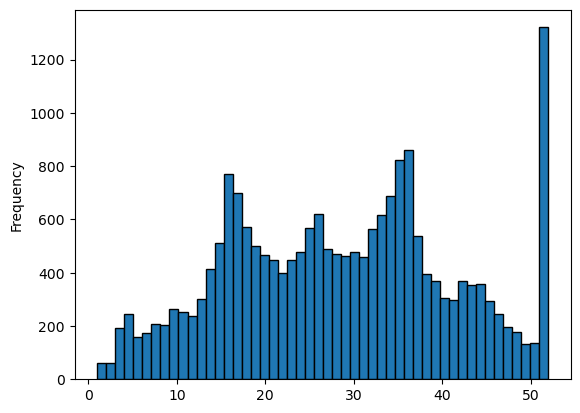

In [1148]:
new_data['HouseAge'].plot(kind='hist', bins=50, edgecolor ='black')

В данных есть явные выбросы, так же попробуем их нивелировать

In [1149]:
df = new_data[['sqrt MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'MedHouseVal']]

In [1150]:
df.drop(df[df['HouseAge'] > 50].index, inplace=True)

C:\Users\sveta\AppData\Local\Temp\ipykernel_2260\4048445684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['HouseAge'] > 50].index, inplace=True)


In [1151]:
filter_X = df[['sqrt MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(filter_X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_3 = model.predict(X_train)
y_test_pred_3 = model.predict(X_test)

In [1152]:
rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_train_pred_3))
r2_train_3 = r2_score(y_train, y_train_pred_3)
print(f'Для обучающей выборки: \nRMSE = {rmse_train_3} \nR2 = {r2_train_3}')

rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
r2_test_3 = r2_score(y_test, y_test_pred_3)
print(f'\nДля тестовой выборки: \nRMSE = {rmse_test_3} \nR2 = {r2_test_3}')

Для обучающей выборки: 
RMSE = 0.7209004504894572 
R2 = 0.5853940712396002

Для тестовой выборки: 
RMSE = 0.7102599795801922 
R2 = 0.6038226343420854


Удаление явно портит метрику $RMSE$, значит этот выброс останется 

In [1153]:
new_data['log HouseAge'] = np.log(new_data['HouseAge'])

C:\Users\sveta\AppData\Local\Temp\ipykernel_2260\2293527169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['log HouseAge'] = np.log(new_data['HouseAge'])


<AxesSubplot:ylabel='Frequency'>

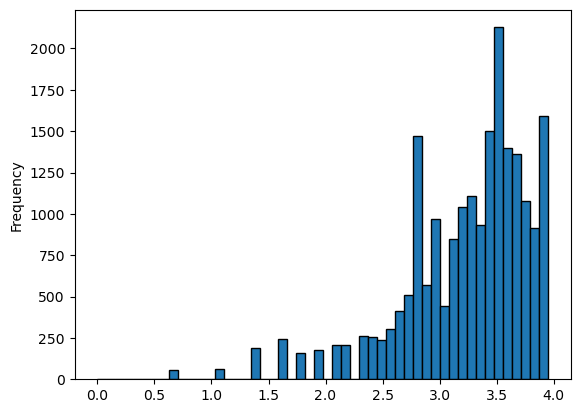

In [1154]:
new_data['log HouseAge'].plot(kind='hist', bins=50, edgecolor ='black')

In [1155]:
new_data.reindex()
new_data.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal,sqrt MedInc,log HouseAge
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,2.885342,3.713572
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,2.881215,3.044522
2,7.2574,52.0,8.288136,37.85,-122.24,3.521,2.693956,3.951244
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,2.375521,3.951244
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,1.961173,3.951244


In [1156]:
filter_X = new_data[['sqrt MedInc', 'log HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = new_data[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(filter_X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_3 = model.predict(X_train)
y_test_pred_3 = model.predict(X_test)

In [1157]:
rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_train_pred_3))
r2_train_3 = r2_score(y_train, y_train_pred_3)
print(f'Для обучающей выборки: \nRMSE = {rmse_train_3} \nR2 = {r2_train_3}')

rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
r2_test_3 = r2_score(y_test, y_test_pred_3)
print(f'\nДля тестовой выборки: \nRMSE = {rmse_test_3} \nR2 = {r2_test_3}')

Для обучающей выборки: 
RMSE = 0.7431059560011187 
R2 = 0.5874041985508894

Для тестовой выборки: 
RMSE = 0.7549346588475039 
R2 = 0.5629248081222245


Существенных изменений в метриках не произошло

###### Распределение признака "AveRooms" (среднее количество комнат на домохозяйство)

<AxesSubplot:>

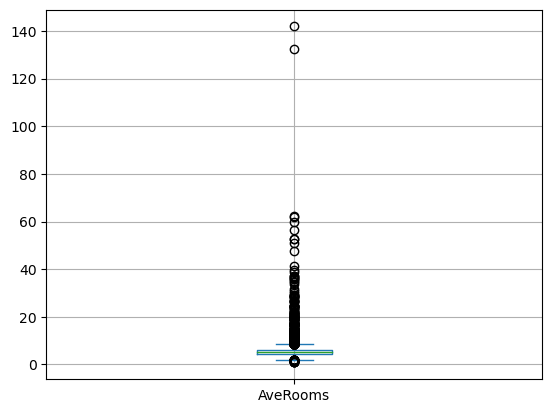

In [1158]:
new_data['AveRooms'].plot(kind='box', grid=True)

In [1159]:
new_data['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

В данных явно присутствуют выбросы. Попробуем их удалить

In [1160]:
df = new_data[['sqrt MedInc', 'log HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'MedHouseVal']]

In [1161]:
df.drop(df[df['AveRooms'] > 20].index, inplace=True)

C:\Users\sveta\AppData\Local\Temp\ipykernel_2260\4099661374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['AveRooms'] > 20].index, inplace=True)


In [1162]:
filter_X = df[['sqrt MedInc', 'log HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(filter_X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_4 = model.predict(X_train)
y_test_pred_4 = model.predict(X_test)

In [1163]:
rmse_train_4 = np.sqrt(mean_squared_error(y_train, y_train_pred_4))
r2_train_4 = r2_score(y_train, y_train_pred_4)
print(f'Для обучающей выборки: \nRMSE = {rmse_train_4} \nR2 = {r2_train_4}')

rmse_test_4 = np.sqrt(mean_squared_error(y_test, y_test_pred_4))
r2_test_4 = r2_score(y_test, y_test_pred_4)
print(f'\nДля тестовой выборки: \nRMSE = {rmse_test_4} \nR2 = {r2_test_4}')

Для обучающей выборки: 
RMSE = 0.7376479864073684 
R2 = 0.5892588507992962

Для тестовой выборки: 
RMSE = 0.7689655278529988 
R2 = 0.5668925931131428


В данном случае удаление оказалось весьма действенным методом, оно повысило и $RMSE$ и $R^2$.

Переменные "Latitude" и "Longitude" менять не имеет смысла

## Выводы
В ходе работы были изучены методы разведочного анализа данных, а именно: выявлены зависимости, найдены аномалии, сформированы и проверены первичные гипотезы. 

Была обучена модель линейной регресси, которая по-разному реагировала на изменения в данных. Качество модели оценивалось с помощью метрик $RMSE$ и $R^2$. Оценки на разных этапах анализа предствлены ниже:


| модель | RMSE | R2 | признаки |
| --- | --- | --- | --- |
| Исходная модель  | 0.7273129 | 0.5943232 | 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' |
| Модель №1 | 0.7424116 | 0.5773051 | 'MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude' |
| Модель №2 | 0.7524765 | 0.5657664 | 'sqrt MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude' |
| Модель №3 | 0.7549346 | 0.5629248 | 'sqrt MedInc', 'log HouseAge', 'AveRooms', 'Latitude', 'Longitude' |
| Модель №4 (AveRooms <= 20)| 0.7689655 | 0.5668925 | 'sqrt MedInc', 'log HouseAge', 'AveRooms', 'Latitude', 'Longitude' |




Результаты неплохие, но есть основания попробовать более сложную модель.